In [1]:
# Install required libraries (run once)
!pip install pandas numpy matplotlib seaborn faker

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from faker import Faker

fake = Faker()

# Set random seed for reproducibility
np.random.seed(42)


In [2]:
# Financial dataset for Currys and Wayfair
financial_data = {
    "Company": ["Currys", "Wayfair"],
    
    # Revenue in billions (based on real trends but simplified)
    "Revenue_Billion": [8.7, 11.9],
    
    # Profit margins (approx real values)
    "Profit_Margin_Percent": [1.5, -2.7],
    
    # Operating margin estimate
    "Operating_Margin_Percent": [2.3, 1.3],
    
    # Number of customers (approx realistic scale)
    "Customers_Million": [25, 21]
}

financial_df = pd.DataFrame(financial_data)

financial_df


,Company,Revenue_Billion,Profit_Margin_Percent,Operating_Margin_Percent,Customers_Million
0,Currys,8.7,1.5,2.3,25
1,Wayfair,11.9,-2.7,1.3,21


In [3]:
# Create monthly sales data
months = pd.date_range(start="2023-01-01", end="2025-12-31", freq='M')

sales_data = []

for month in months:
    
    currys_sales = np.random.normal(720, 80)   # in millions
    wayfair_sales = np.random.normal(950, 120) # in millions
    
    sales_data.append([month, "Currys", currys_sales])
    sales_data.append([month, "Wayfair", wayfair_sales])

sales_df = pd.DataFrame(
    sales_data,
    columns=["Date", "Company", "Sales_Million"]
)

sales_df.head()


/var/folders/88/w4w1n8l12kd_z42_6mrnndmw0000gn/T/ipykernel_57461/3191372555.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  months = pd.date_range(start="2023-01-01", end="2025-12-31", freq='M')


,Date,Company,Sales_Million
0,2023-01-31,Currys,759.737132
1,2023-01-31,Wayfair,933.408284
2,2023-02-28,Currys,771.815083
3,2023-02-28,Wayfair,1132.763583
4,2023-03-31,Currys,701.267730


In [4]:
# Calculate profit based on margins

profit_data = []

for index, row in sales_df.iterrows():
    
    if row["Company"] == "Currys":
        margin = 0.015
    else:
        margin = -0.027
        
    profit = row["Sales_Million"] * margin
    
    profit_data.append(profit)

sales_df["Profit_Million"] = profit_data

sales_df.head()
# Create demographic dataset

num_customers = 2000

demographics_data = []

for i in range(num_customers):
    
    company = np.random.choice(["Currys", "Wayfair"])
    
    age = np.random.randint(18, 75)
    
    gender = np.random.choice(["Male", "Female"])
    
    income = np.random.normal(35000, 12000)
    
    location = fake.city()
    
    demographics_data.append([
        company,
        age,
        gender,
        income,
        location
    ])

demographics_df = pd.DataFrame(
    demographics_data,
    columns=[
        "Company",
        "Age",
        "Gender",
        "Income",
        "City"
    ]
)

demographics_df.head()


,Date,Company,Sales_Million,Profit_Million
0,2023-01-31,Currys,759.737132,11.396057
1,2023-01-31,Wayfair,933.408284,-25.202024
2,2023-02-28,Currys,771.815083,11.577226
3,2023-02-28,Wayfair,1132.763583,-30.584617
4,2023-03-31,Currys,701.267730,10.519016


In [5]:
# Create demographic dataset

num_customers = 2000

demographics_data = []

for i in range(num_customers):
    
    company = np.random.choice(["Currys", "Wayfair"])
    
    age = np.random.randint(18, 75)
    
    gender = np.random.choice(["Male", "Female"])
    
    income = np.random.normal(35000, 12000)
    
    location = fake.city()
    
    demographics_data.append([
        company,
        age,
        gender,
        income,
        location
    ])

demographics_df = pd.DataFrame(
    demographics_data,
    columns=[
        "Company",
        "Age",
        "Gender",
        "Income",
        "City"
    ]
)

demographics_df.head()


,Company,Age,Gender,Income,City
0,Currys,31,Male,33193.593701,Traceytown
1,Currys,49,Male,23413.307937,Charlestown
2,Currys,69,Male,45842.389888,Rollinston
3,Currys,56,Male,35228.003973,East Austin
4,Currys,60,Male,25298.076765,Michaelbury


In [6]:
combined_df = pd.merge(
    sales_df,
    financial_df,
    on="Company"
)

combined_df.head()


,Date,Company,Sales_Million,Profit_Million,Revenue_Billion,Profit_Margin_Percent,Operating_Margin_Percent,Customers_Million
0,2023-01-31,Currys,759.737132,11.396057,8.7,1.5,2.3,25
1,2023-01-31,Wayfair,933.408284,-25.202024,11.9,-2.7,1.3,21
2,2023-02-28,Currys,771.815083,11.577226,8.7,1.5,2.3,25
3,2023-02-28,Wayfair,1132.763583,-30.584617,11.9,-2.7,1.3,21
4,2023-03-31,Currys,701.267730,10.519016,8.7,1.5,2.3,25


In [7]:
# Save all datasets

financial_df.to_csv("financial_data.csv", index=False)

sales_df.to_csv("sales_data.csv", index=False)

demographics_df.to_csv("demographics_data.csv", index=False)

combined_df.to_csv("combined_data.csv", index=False)

print("Datasets saved successfully!")


Datasets saved successfully!


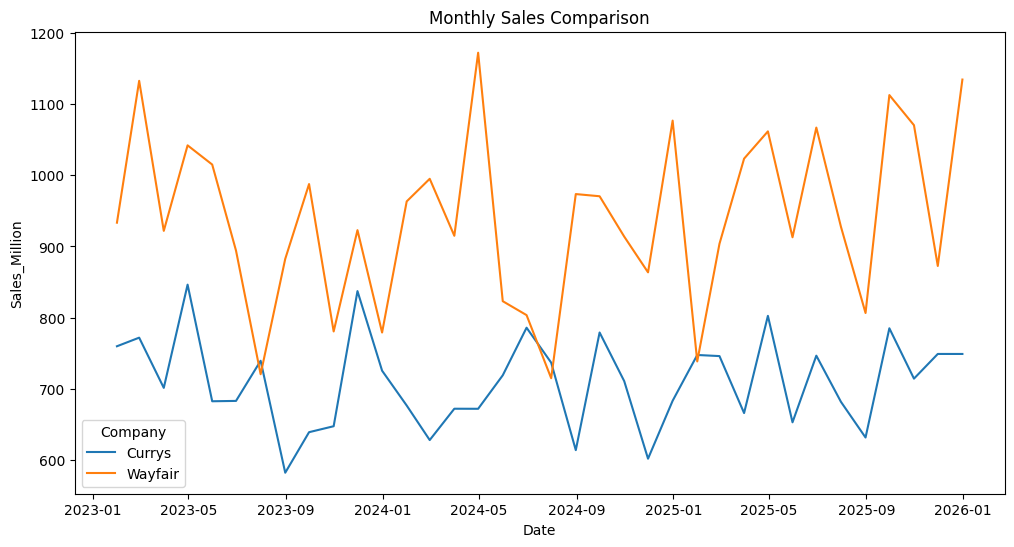

In [8]:
plt.figure(figsize=(12,6))

sns.lineplot(
    data=sales_df,
    x="Date",
    y="Sales_Million",
    hue="Company"
)

plt.title("Monthly Sales Comparison")
plt.show()


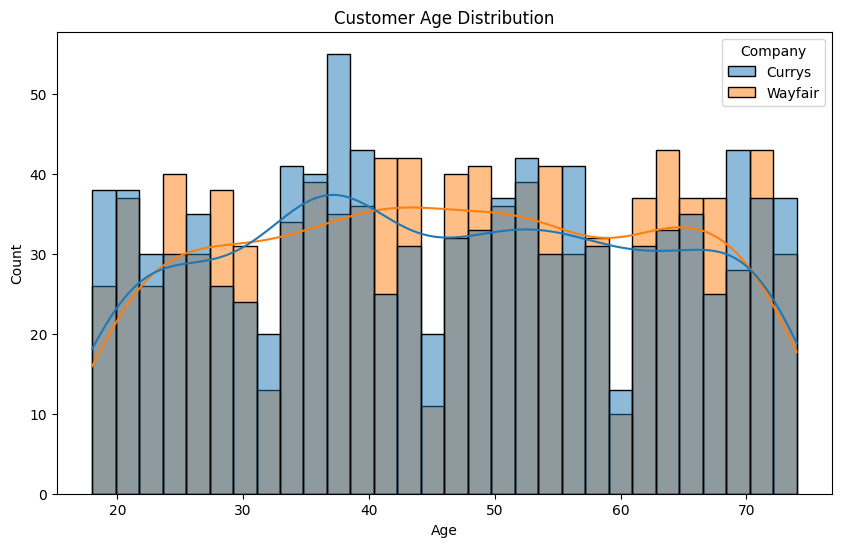

In [9]:
plt.figure(figsize=(10,6))

sns.histplot(
    data=demographics_df,
    x="Age",
    hue="Company",
    bins=30,
    kde=True
)

plt.title("Customer Age Distribution")
plt.show()
